## Okay 
i want to start a new project and i will be implementing the entire process of ML model which are <br>
1. Getting the data
2. Data Cleaning and Formatting
3. Exploratory Data Analysis
4. Feature Enginerring and Feature Selection
5. Establish a Baseline and compare several ML models on a performance metric
6. Choose Best Model on a performance metric and perform Hyperparameter tuning
7. Evaluate the best model on the test set
8. Interpret the model result
9. Draw conclusion and write a well documented report
0. Make **Money**

## 1. Getting Data

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. <br>

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. <br>

### Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?
<br>
I have downloaded the dataset so i just bring it to the notebook with the help of the pandas read_csv function


In [1]:
import pandas as pd # for dataframe manipulation
import numpy as np # for numerical analysis
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for advannce and easy visualization

In [2]:
df = pd.read_csv('diabetes.csv')
print('Data loaded successfully')

Data loaded successfully


## 2. Data Cleaning and Formatting

This step is concerned with the cleaning of data, formating data for algorithms to use. Cleaning data can be detecting missing values and filling them, identifying outlier and removing them etc.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Let Understand something <br>
Quick Question: What does it mean to have a std closer to the mean? <br>
first what is std? STD is a number used to tell how measurement for a group are spread out from the average (mean), or expected value. A low std means that most of the numbers are closer to the mean while a higher std means that the numbers are more spread out. <br>
So to answer the question what it means to have a std closer to mean like mean is 100 and std is 50, then the data in this group are widely spread out and if a group has mean = 100 and std = 10, then the data is marginally spread out that is the data has a long cone when visually checked out, that is the data are within a small range. <br>

Another Quick Question : What do you understand by 25% and 75% of a grouo of data? <br>
so to answer that we need to know what percentile really means? so what is percentile? <br>
Percentile is defined in various ways, percentile is a number where a certain percentage of scores fall below that number. so in a test you score 67 out of 90 and you fall into the 90th percentile, that means you scored better than 90% of people who took the test. the 25th percentile is called first quartile, the 50th percentile is called the median and 75th percentile is called  the third quartile. The difference between the third and first quartile is the interquartile range. <br>
<br>
So to answer the question, 25% means 25% of the data falls below that value and the 75% means 75% of the data falls below that value.

According to the site where the data was gotten from, 0 are used to represent missing values so when we check for missing with isnull() we get nothig we need to check for zero and need to be careful doing so too because we dont want to change the target values

## Data Cleaning
**Check for Missing Values**

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Check for Zero 0**

In [9]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

We require understanding of what these features represent what values they can have and what they must not have, meaning that we should check for data intergrity by asking for consistency in the data. Yes some feature (columns) can have 0 has values but some must not because it wont be right.

## Data Description

1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an Oral glucose tolerance test
3. BloodPressure: Diastollic blood pressure (mmHg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI Body mass index (weight in Kg/ (height in m)^2)
7. DiabetesPedigreeFunction Diabetes pedigree FUnction
8. Age Age(years)
9. Outcome class variable (0 or 1) 268 of 768 are 1, the others are 0

So from above and asking around, i concluded that features like Pregnancies and Outcome can have 0 values but others cant. so i dealt with them

In [10]:
# --- replace all 0s with NaNs ----

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness',
                                                                      'Insulin','BMI']].replace(0,np.NaN)

# This was done to deal with the missing values 

In [11]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
# --- replace all nans with their median ----

df.fillna(df.median(), inplace=True)

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

For the formatting Part there is no real formatting here let say we have categorical data or features then we could have one hot encode or we could have label encode. But in this data all features are numerics so our algorithm will accept it

## 3. EDA

**There is a saying that torture the data and it will confess to anything**
So investigating a data will allow us answer some question we might have and test hypothesis and derive insights

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## EDA 
**Univariate Analysis**

Text(0.5, 1.0, 'Count of diffrent Pregnancy values in the Data')

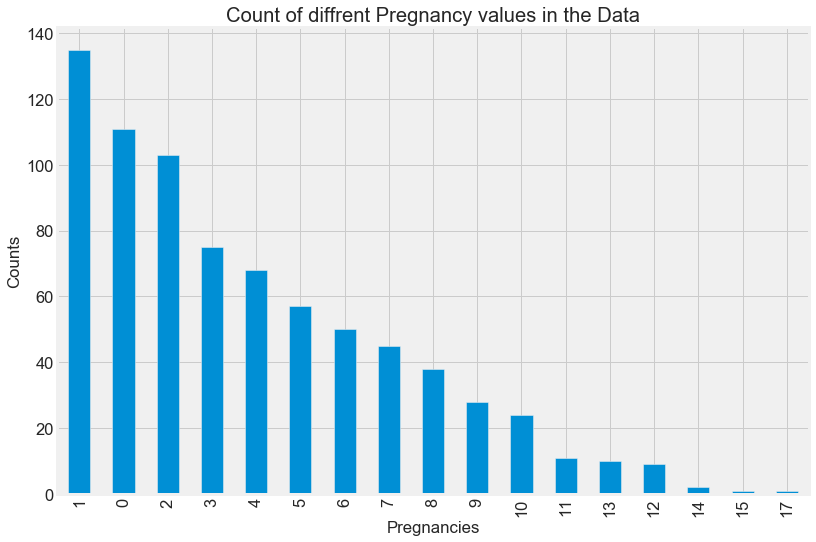

In [18]:
sns.set(font='arial', font_scale=1.5)
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')

df['Pregnancies'].value_counts().plot(kind='bar')
plt.xlabel('Pregnancies')
plt.ylabel('Counts')
plt.title('Count of diffrent Pregnancy values in the Data')

Text(0.5, 1.0, 'Distribution of Glucose')

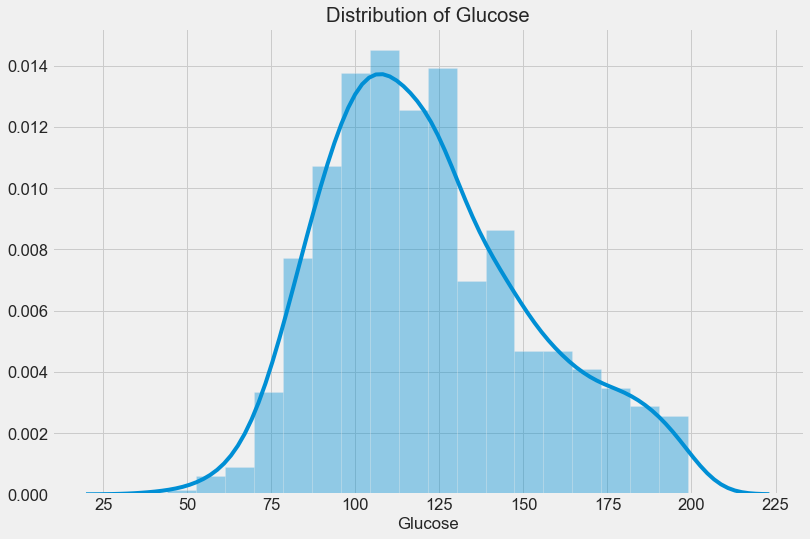

In [22]:
plt.figure(figsize=(12, 8))

sns.distplot(df['Glucose'])
plt.title('Distribution of Glucose')

The feature `Glucose` is normally distributed

Text(0.5, 1.0, 'Distribution of BloodPressure')

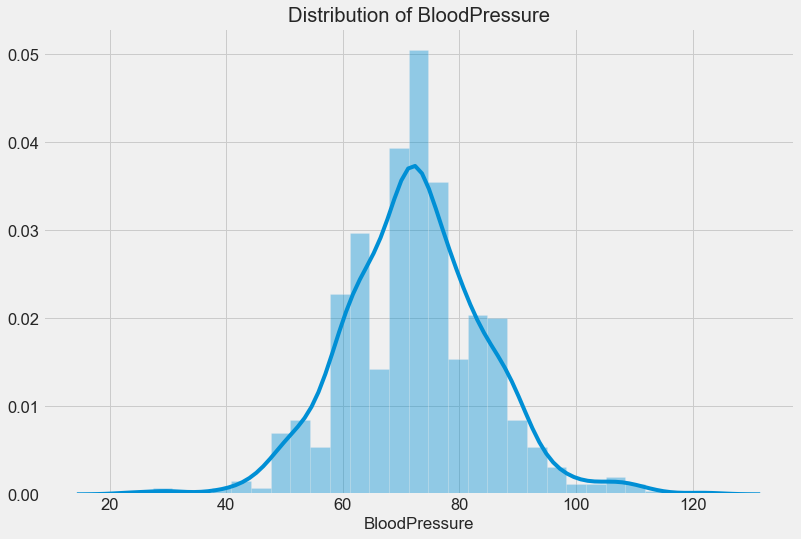

In [25]:
plt.figure(figsize=(12, 8))

sns.distplot(df['BloodPressure'])
plt.title('Distribution of BloodPressure')

Text(0.5, 1.0, 'Distribution of SkinThickness')

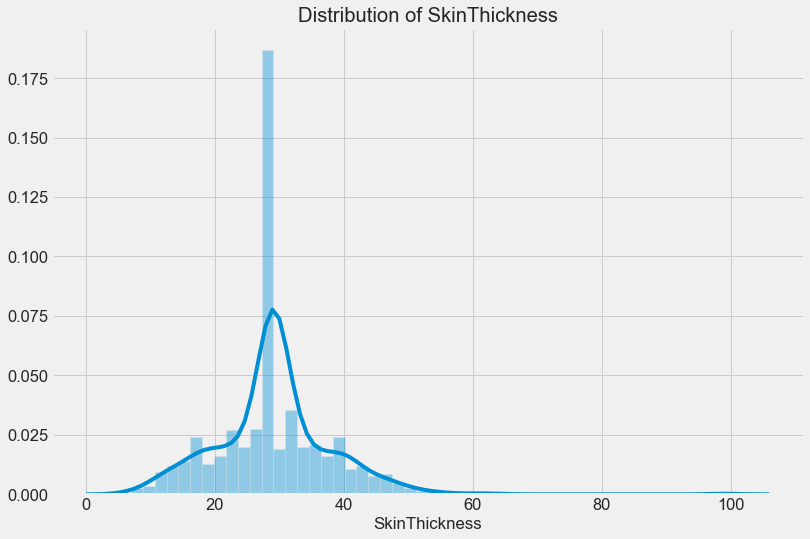

In [27]:
plt.figure(figsize=(12, 8))

sns.distplot(df['SkinThickness'])
plt.title('Distribution of SkinThickness')

Well it seems the data is normally distributed but we cant take the chance because much of the data still has values greater than 27 so we say it is positively skewed, and one way of dealing with this kind of data is by taking it log and squre. somlet do that

Text(0.5, 1.0, 'Logarithm Distribution of SkinThickness')

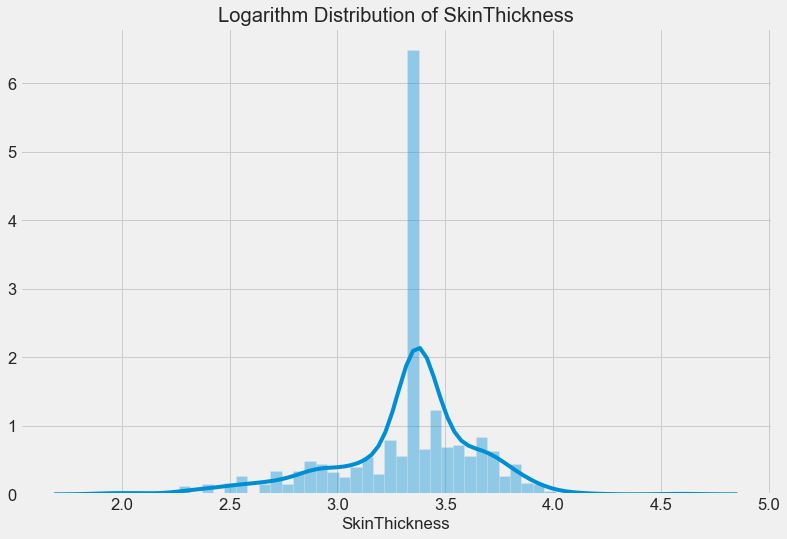

In [29]:
plt.figure(figsize=(12, 8))

sns.distplot(np.log(df['SkinThickness']))
plt.title('Logarithm Distribution of SkinThickness')

Text(0.5, 1.0, 'Distribution of Insulin')

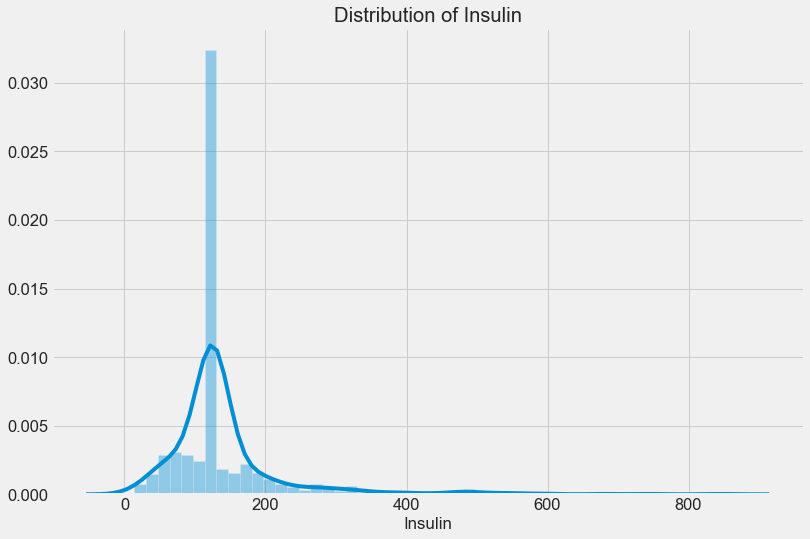

In [30]:
plt.figure(figsize=(12, 8))

sns.distplot(df['Insulin'])
plt.title('Distribution of Insulin')

Again, Positively Skewed

Text(0.5, 1.0, 'Logarithm Distribution of SkinThickness')

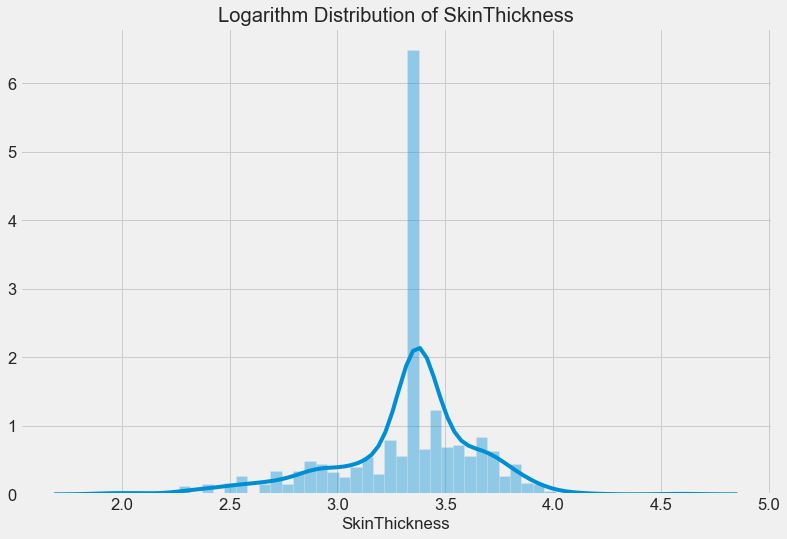

In [31]:
plt.figure(figsize=(12, 8))

sns.distplot(np.log(df['SkinThickness']))
plt.title('Logarithm Distribution of SkinThickness')

Text(0.5, 1.0, 'Distribution of BMI')

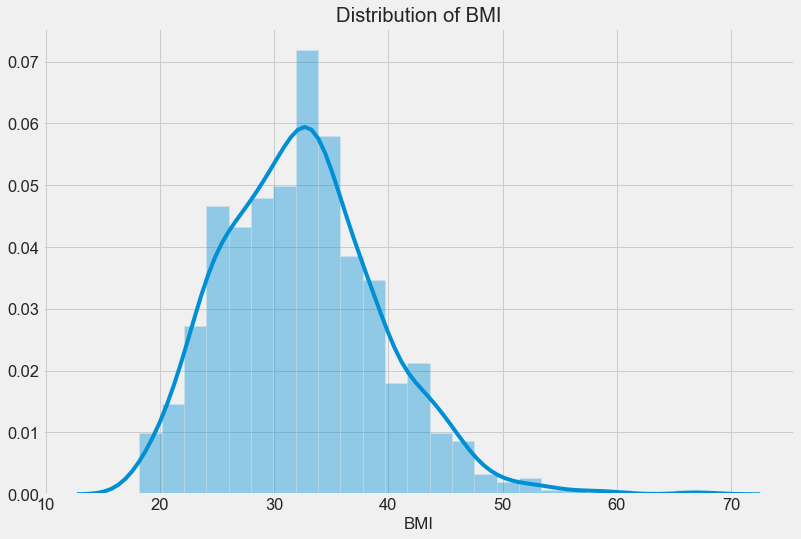

In [33]:
plt.figure(figsize=(12, 8))

sns.distplot(df['BMI'])
plt.title('Distribution of BMI')

Text(0.5, 1.0, 'Logarithm Distribution of BMI')

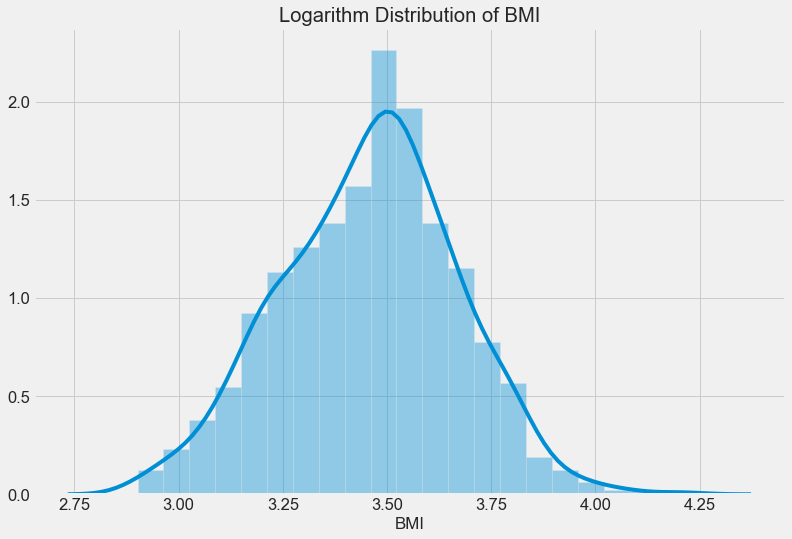

In [35]:
plt.figure(figsize=(12, 8))

sns.distplot(np.log(df['BMI']))
plt.title('Logarithm Distribution of BMI')

Text(0.5, 1.0, 'Distribution of DiabetesPedigreeFunction')

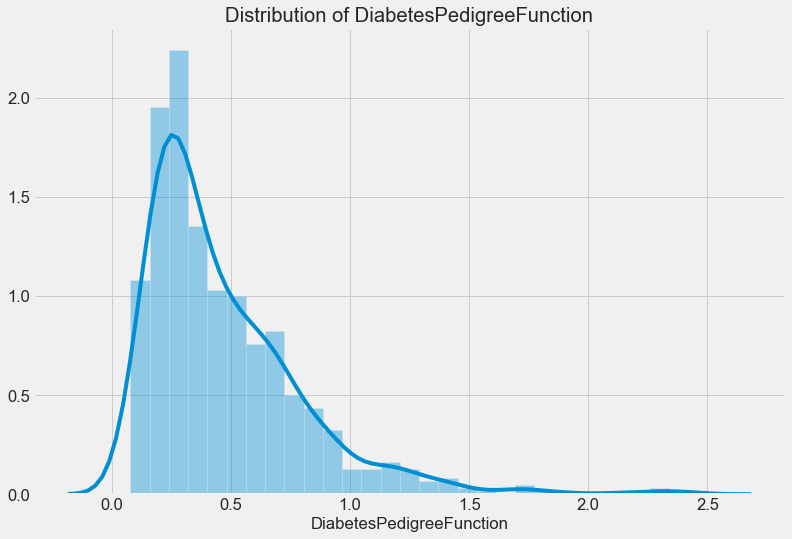

In [36]:
plt.figure(figsize=(12, 8))

sns.distplot(df['DiabetesPedigreeFunction'])
plt.title('Distribution of DiabetesPedigreeFunction')

Text(0.5, 1.0, 'Logarithm Distribution of DiabetesPedigreeFunction')

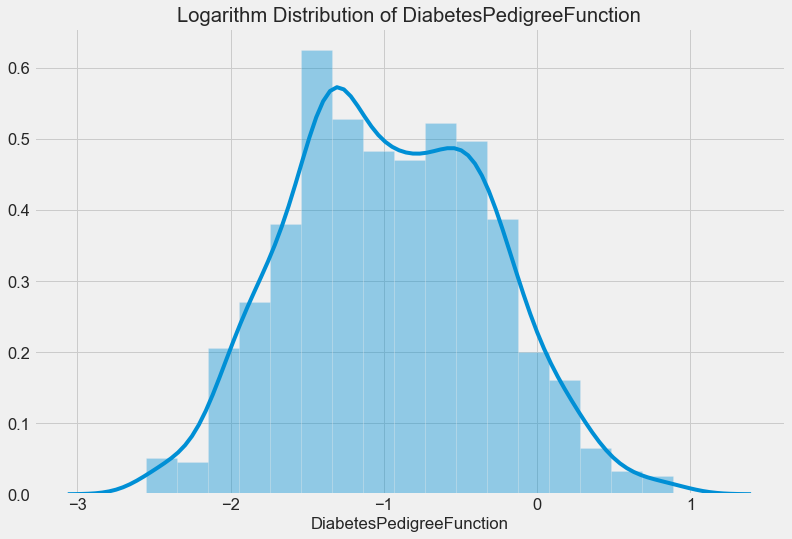

In [37]:
plt.figure(figsize=(12, 8))

sns.distplot(np.log(df['DiabetesPedigreeFunction']))
plt.title('Logarithm Distribution of DiabetesPedigreeFunction')

Text(0.5, 1.0, 'Distribution of Age')

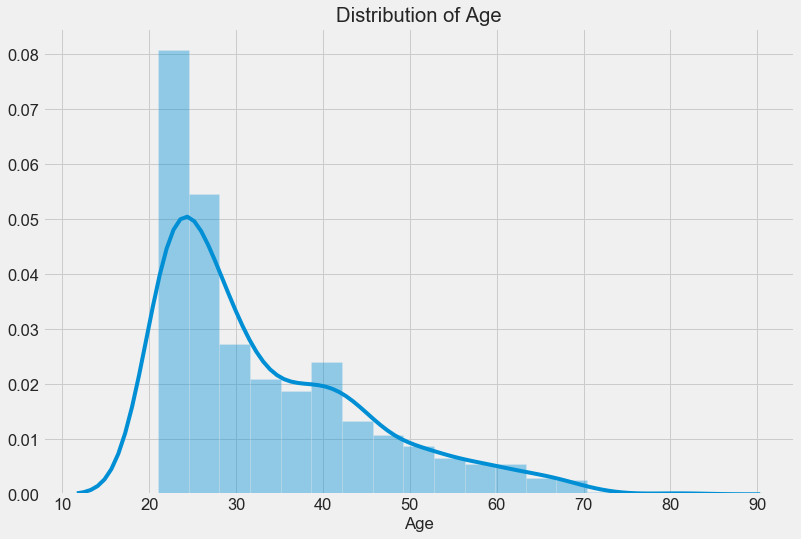

In [38]:
plt.figure(figsize=(12, 8))

sns.distplot(df['Age'])
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Age')

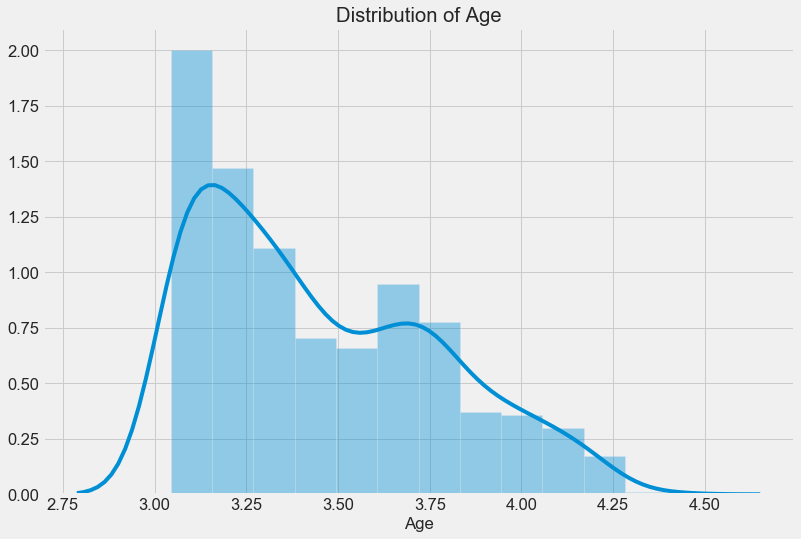

In [39]:
plt.figure(figsize=(12, 8))

sns.distplot(np.log(df['Age']))
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Count of Outcome in the Data')

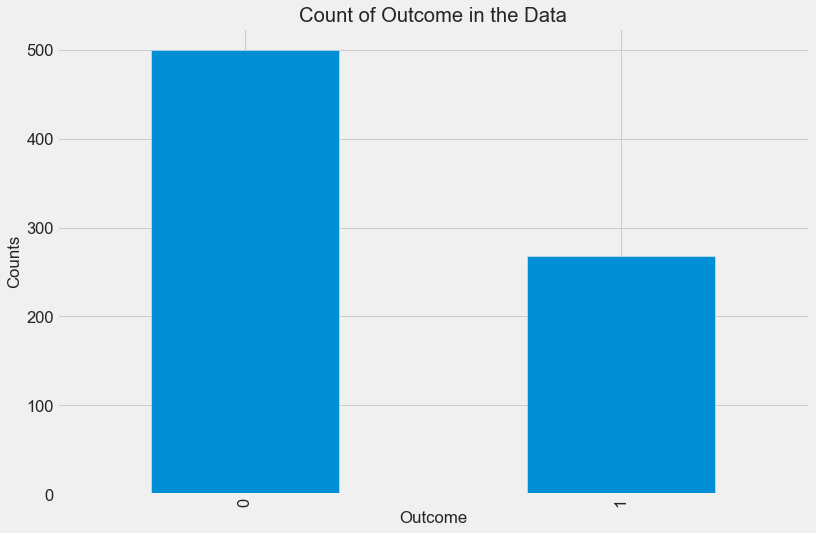

In [41]:
plt.figure(figsize=(12, 8))

df['Outcome'].value_counts().plot(kind='bar')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.title('Count of Outcome in the Data')

**Bivariate Analysis**

Text(0.5, 1.0, 'Boxplot of Glucose distribution based on Target')

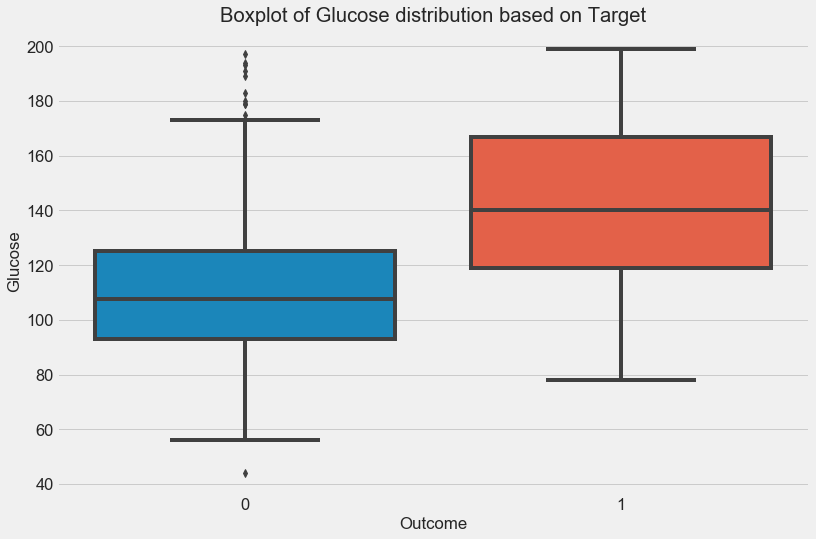

In [42]:
# Using BoxPlot
plt.figure(figsize=(12, 8))

sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Boxplot of Glucose distribution based on Target')

From the chart above, there is prescence of outliers in Glucose where outcome = 0. Also the values of Glucose where Outcome=1 is widely spread and the minimum value is about 79 while the maximum value is 200. We could drop the Outliers here and it will or might favour our model but we will test both

To limit the Exploration and focus on just features with greater correlation with the target we could use the corr() method to get the correlation values of each feature

**Get Correlation**

In [43]:
correlation = df.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.081770   
Glucose                      0.128213  1.000000       0.218937       0.192615   
BloodPressure                0.208615  0.218937       1.000000       0.191892   
SkinThickness                0.081770  0.192615       0.191892       1.000000   
Insulin                      0.025047  0.419451       0.045363       0.155610   
BMI                          0.021559  0.231049       0.281257       0.543205   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.102188   
Age                          0.544341  0.266909       0.324915       0.126107   
Outcome                      0.221898  0.492782       0.165723       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.021559                 -0.033523   
Glucose                   0.419451  0.231

In [45]:
correlation['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64

Text(0.5, 1, 'Correlation Values')

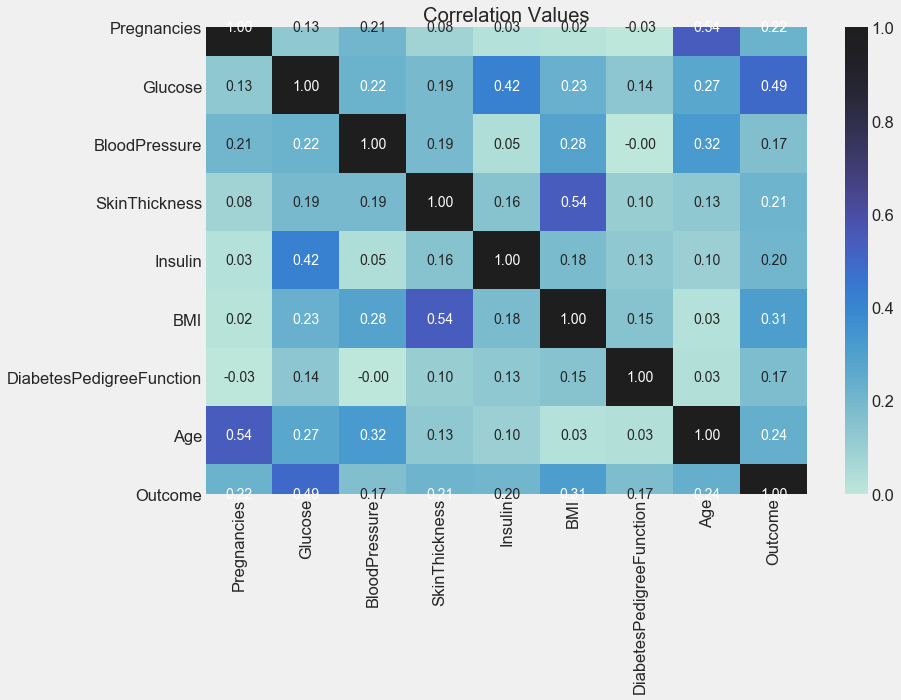

In [46]:
plt.figure(figsize=(12, 8))

sns.heatmap(correlation, annot=True, fmt='.2f', vmax=1, center=True, vmin=0)
plt.title('Correlation Values')

If i decide to stop my Eda now i can conclude that
1. Pattern there is a bias in the data based on number of 0=500 and 1=268 in the data. to fix this we can balance the data either by reducing the numbers of 0's or adding more rows of outcome values = 1
2. pattern the Target (Outcome) is correlated with the features Glucose, BMI, Age and Pregnancies repectively in a descending order
3. Anomalies Outliers are present in the data for example in the feature Glucose of value outcome=0 there are outlier more on this
4. Anomalies Some features are Positively Skewed which mean it needs fixing either by taking the log which has been tested and has worked out as well
5. Assuption Check If Glucose level is high, then the person is likely to have Diabetes has been confirmed
6. Assumption Check if number of pregnancy is more than 5, chances of having diabetes is high or low
7. Assumption check if BMI is high, what are the chances of having diabetes?

To Answer some of these assumptions and varify the hypothesis

In [54]:
# Define which value of Glucose is high?
people_with_high_glucose = []
high_glucose = 151
for val in df['Glucose']:
    if val > high_glucose and df['Outcome'] == 1:
        people_with_high_glucose.append(1)
    else:
        people_with_high_glucose.append(0)
        
        
people_with_high_glucose.count(0)
    

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Text(0.5, 1.0, '# Chances of having diabetes based on number of pregnancy')

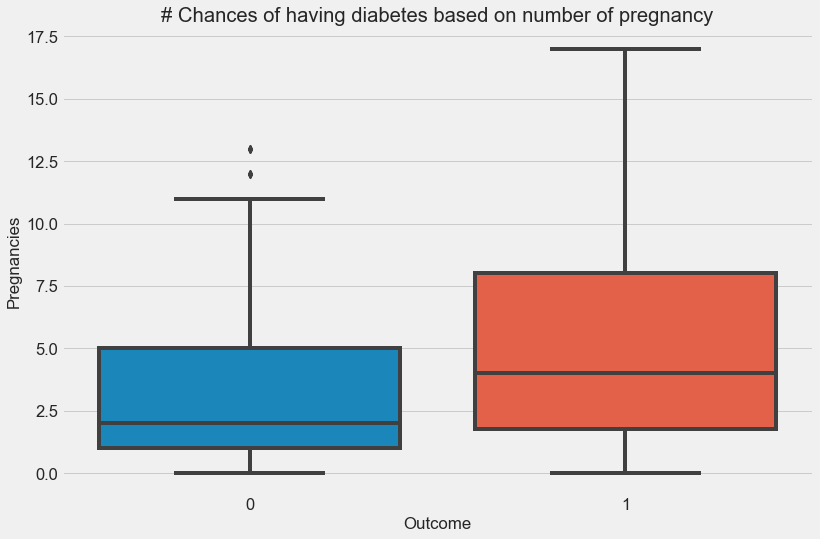

In [58]:
# Chances of having diabetes based on number of pregnancy
plt.figure(figsize=(12, 8))

sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.title('# Chances of having diabetes based on number of pregnancy')

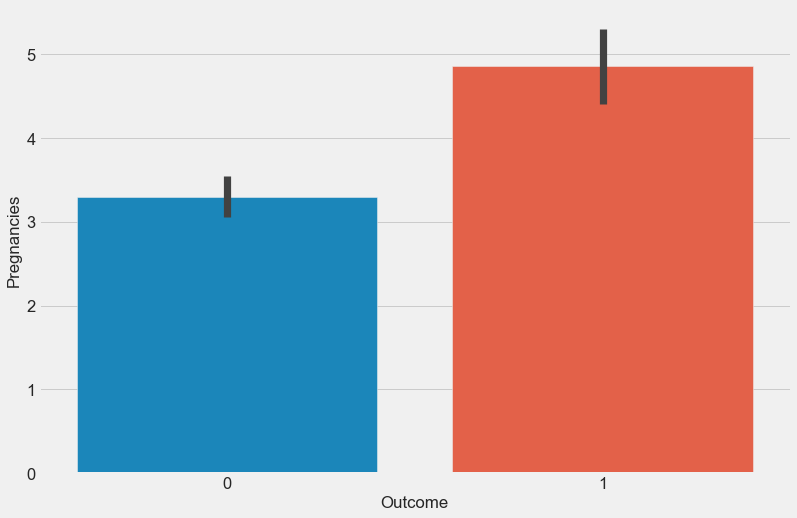

In [59]:
plt.figure(figsize=(12, 8))

sns.barplot(x='Outcome', y='Pregnancies', data=df)

Assumption Varified if the number of pregnancy is more than 4 then the chances of having Diabetes is high

In [62]:
have_diabetes_based_no_preg = []
for val in df['Pregnancies']:
    if val > 4:
        have_diabetes_based_no_preg.append(1)
    else:
        have_diabetes_based_no_preg.append(0)
        
have_diabetes_based_no_preg.count(1)

276

In [65]:
# if BMI is high
# df['BMI'].describe()
high_bmi = 40
high_bmi_df = df[df['BMI'] > high_bmi]
high_bmi_df['Outcome'].value_counts()

1    54
0    42
Name: Outcome, dtype: int64

Assumption on High BMI varified

## 4. Feature Engineering and Feature Selection
**`Feature Engineering`**

**Generate New features 
based on the EDA above, features that can be generated are log_skinThickness, log_insulin, log_BMI**

In [68]:
df['log_SkinThickness'] = np.log(df['SkinThickness'])
df['log_Insulin'] = np.log(df['Insulin'])
df['log_BMI'] = np.log(df['BMI'])
df['log_Age'] = np.log(df['Age'])

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,log_SkinThickness,log_Insulin,log_BMI,log_Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,3.555348,4.828314,3.514526,3.912023
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,3.367296,4.828314,3.280911,3.433987
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,3.367296,4.828314,3.148453,3.465736
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,3.135494,4.543295,3.335770,3.044522
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,3.555348,5.123964,3.763523,3.496508


In [74]:
df['BloodSugar'] = np.abs(df['Insulin'] - df['Glucose'])
df['high_BMI'] = df['BMI'].apply(lambda x: 1 if x > 30 else 0)

,BMI,high_BMI
0,33.6,1
1,26.6,0
2,23.3,0
3,28.1,0
4,43.1,1


In [75]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,log_SkinThickness,log_Insulin,log_BMI,log_Age,BloodSugar,high_BMI
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,3.555348,4.828314,3.514526,3.912023,23.0,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,3.367296,4.828314,3.280911,3.433987,40.0,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,3.367296,4.828314,3.148453,3.465736,58.0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,3.135494,4.543295,3.335770,3.044522,5.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,3.555348,5.123964,3.763523,3.496508,31.0,1


**`Feature Selection`**

In [80]:
# to be informed we check for correlation
correlation = df.corr()
k = 10
cols = correlation.nlargest(k, 'Outcome')['Outcome'].index
print(cols)

Index(['Outcome', 'Glucose', 'log_BMI', 'BMI', 'high_BMI', 'log_Age',
       'log_Insulin', 'Age', 'Pregnancies', 'log_SkinThickness'],
      dtype='object')


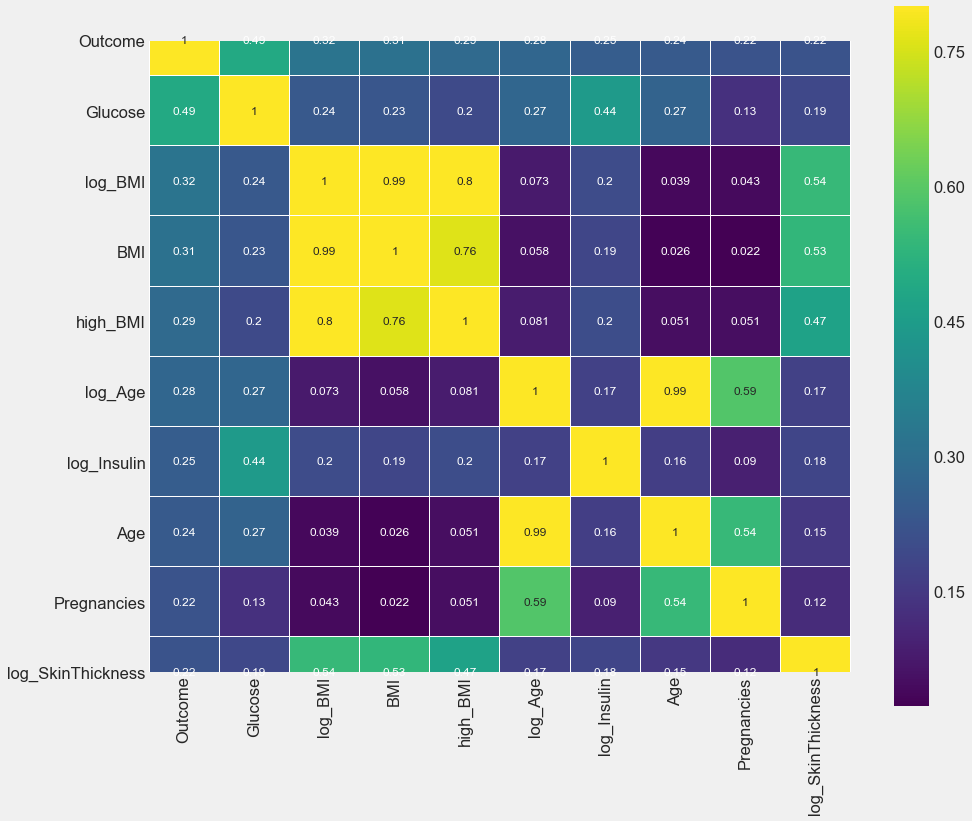

In [81]:
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(cm, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis', linecolor='white',
            xticklabels=cols.values, annot_kws={'size':12}, yticklabels=cols.values)

In [83]:
cols_to_drop = ['high_BMI', 'BMI', 'Age']
cols = cols.drop(cols_to_drop)

c:\users\abuton\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


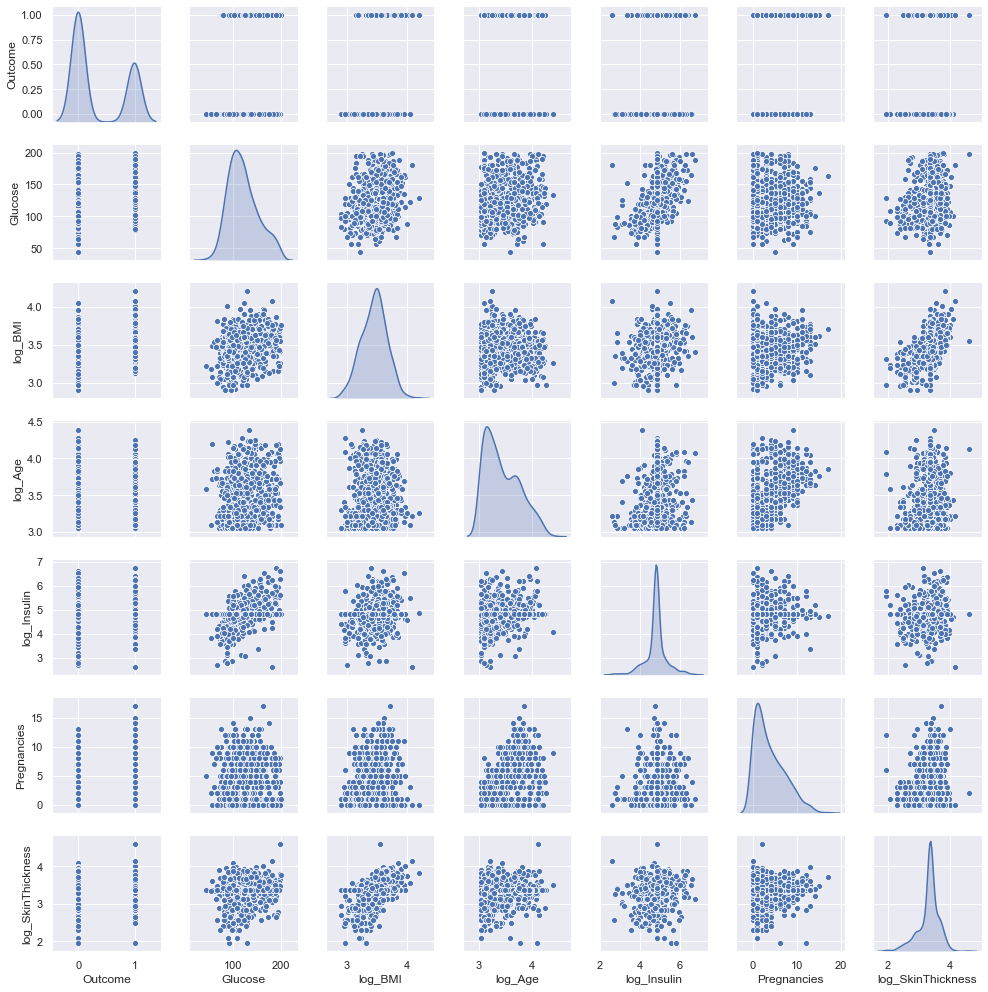

In [85]:
sns.set()
sns.pairplot(df[cols], size=2, kind='scatter', diag_kind='kde')

In [123]:
cols = cols.drop(['Outcome'])
features = df[cols]
target = df['Outcome']
features.head()

,Glucose,log_BMI,log_Age,log_Insulin,Pregnancies,log_SkinThickness
0,148.0,3.514526,3.912023,4.828314,6,3.555348
1,85.0,3.280911,3.433987,4.828314,1,3.367296
2,183.0,3.148453,3.465736,4.828314,8,3.367296
3,89.0,3.335770,3.044522,4.543295,1,3.135494
4,137.0,3.763523,3.496508,5.123964,0,3.555348


In [88]:
target.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## 5. Establish a Baseline and compare several ML models on a metric 
`Performance Metric` = **Accuracy**

The baseline for this model based on the choosen metric will be 70%. There are Professional ways of doing this i guess but base on my understanding and metric i will use **70%** as my baseline. What this means is that any algorithm giving accuaracy less than 70% will be discarded, at the long run the algorithm with the highest accuracy score will be selected

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)
features[:1]

array([[0.86604475, 0.2694386 , 1.43637931, 0.02080115, 0.63994726,
        0.71274614]])

In [92]:
features

array([[ 0.86604475,  0.2694386 ,  1.43637931,  0.02080115,  0.63994726,
         0.71274614],
       [-1.20506583, -0.8393791 , -0.04593931,  0.02080115, -0.84488505,
         0.13871997],
       [ 2.01666174, -1.46807035,  0.05250873,  0.02080115,  1.23388019,
         0.13871997],
       ...,
       [-0.02157407, -0.91129486, -0.14761572, -0.19880353,  0.3429808 ,
        -0.56885042],
       [ 0.14279979, -0.25266408,  1.2445128 ,  0.02080115, -0.84488505,
         0.13871997],
       [-0.94206766, -0.20559246, -0.97152211,  0.02080115, -0.84488505,
         0.34229423]])

**Compare Several ML Models**

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import neighbors
from sklearn import ensemble
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

### Logistic Regression

In [105]:
log_reg = linear_model.LogisticRegression()
list_scores = []
log_reg.fit(features, target)
log_reg_score = cross_val_score(log_reg, features, target, cv=10, scoring='accuracy').mean()
print(log_reg_score)
list_scores.append(log_reg_score)

0.7695488721804511


### Random Forest Classifier

In [106]:
rf = ensemble.RandomForestClassifier(random_state=1, n_estimators=400)

rf.fit(features, target)
rf_score = cross_val_score(rf, features, target, cv=10, scoring='accuracy').mean()
print(rf_score)
list_scores.append(rf_score)

0.7447197539302802


### KNeighbours Classifier

In [107]:
cv_scores = []
# --- number of folds ---
folds = 10
#---creating odd list of K for KNN--
ks = list(range(1,int(len(features) * ((folds - 1)/folds)), 2))
#---perform k-fold cross validation--
for k in ks:
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)

    score = cross_val_score(knn, features, target, cv=folds, scoring='accuracy').mean()

    cv_scores.append(score)
#---get the maximum score--
knn_score = max(cv_scores)
#---find the optimal k that gives the highest score--
optimal_k = ks[cv_scores.index(knn_score)]
print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
list_scores.append(knn_score)

The optimal number of neighbors is 17
0.7747436773752565


### Gradient Boosting Classifier

In [108]:
grb = ensemble.GradientBoostingClassifier(random_state=1, learning_rate=0.01)

grb.fit(features, target)
grb_score = cross_val_score(grb, features, target, cv=10, scoring='accuracy').mean()
print(grb_score)
list_scores.append(grb_score)

0.7369958988380041


### SVM

In [109]:
svm_linear = svm.SVC(kernel='linear')

svm_linear.fit(features, target)
svm_linear = cross_val_score(svm_linear, features, target, cv=10, scoring='accuracy').mean()
print(svm_linear)
list_scores.append(svm_linear)

0.7695659603554341


In [110]:
list_scores

[0.7695488721804511,
 0.7447197539302802,
 0.7747436773752565,
 0.7369958988380041,
 0.7695659603554341]

#### Selecting Best Model

In [112]:
algorithms = ['Logistic Regression', 'Random Forest Classifier', 'KNeighbours Classifier', 
              'Gradient Boosting Classifier', 'Support Vector Machine']
cv_mean = pd.DataFrame(list_scores, index=algorithms)
cv_mean.columns = ['Accuracy']
cv_mean.sort_values(by='Accuracy', ascending=False)

,Accuracy
KNeighbours Classifier,0.774744
Support Vector Machine,0.769566
Logistic Regression,0.769549
Random Forest Classifier,0.744720
Gradient Boosting Classifier,0.736996


From above, the selected Algorithm is KNeighbours Classifier with the highest value of Accuracy 0.77

## 6. Perform Hyperparameter Tuning on the Selected Algorithm

In [116]:
cv_scores = []
# --- number of folds ---
folds = 30
#---creating odd list of K for KNN--
ks = list(range(1,int(len(features) * ((folds - 1)/folds)), 2))
#---perform k-fold cross validation--
for k in ks:
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)

    score = cross_val_score(knn, features, target, cv=folds, scoring='accuracy').mean()

    cv_scores.append(score)
#---get the maximum score--
knn_score = max(cv_scores)
#---find the optimal k that gives the highest score--
optimal_k = ks[cv_scores.index(knn_score)]
print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
# result.append(knn_score)

The optimal number of neighbors is 19
0.7763247863247863


After Hyperparameter tuning, the selected algorithm is used to create a model and can be used to predict. <br>
We could see a slight increase in the accuracy score.

## 7. Evaluate the model on the Test Data

In [124]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1, test_size=.2)
model = neighbors.KNeighborsClassifier(n_neighbors=19)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7402597402597403


In [125]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        99
           1       0.71      0.45      0.56        55

    accuracy                           0.74       154
   macro avg       0.73      0.68      0.69       154
weighted avg       0.74      0.74      0.72       154



## 8. Interpret the model Result

#### Permutation Importance using ELI5 library

What features does a model think are important? What features might have a greater impact on the model predictions than the others? this is called feature importance and permutation importance is a technique used widely for calculating feature importance. it helps to see when our model produces counterintuitive results, and it helps to show the others when our model is working as we'd hope. <br><br>

The idea is simple: Randomly permutate or shuffle a single column in the validation dataset leaving all the other columns intact. A feature is considered important if the model's accuracy drops a lot and causes an increase in error. On the other hand, a feature is considered 'unimportant' if shuffling its values dont affect the models accuracy. <br>

Permutation importance is useful for debugging, understanding your model, and communicating a high-level overview from your model. Permutation importance is calculated after a model has been fitted. ELI5 is a python library which allows to visualize and debug various ML models using unified API. it has built in support for several ML frameworks and provides a way to explain black-box models

In [126]:
# calculating and Displaying importance using the eli5 library
plt.figure(figsize=[10,10])
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.1390 ± 0.0816,Glucose
0.0091 ± 0.0064,log_Age
0.0052 ± 0.0052,log_Insulin
-0.0013 ± 0.0052,log_SkinThickness
-0.0013 ± 0.0052,log_BMI
-0.0117 ± 0.0397,Pregnancies


<Figure size 720x720 with 0 Axes>

### Interpretation

The features at the top are the most important and at the bottom, the least. For example, Glocose level is the most important feature which decides whether a person will have diebetes, which also makes sense. <br>
The number after +- measures how performance varied from one reshuffling to the next. <br>
Some weights are negative. This is because in those cases predictions on the shuffled data were found to be more accurate than the real data

## Partial Dependence Plots

The partial dependence plot (pdp) shows the marginal effect one or two features have on the predicted outcome of a ML model.
PDP shows how a feature affects predictions. PDP can show the relationship between the target and the selected features via 1d or 2D plots

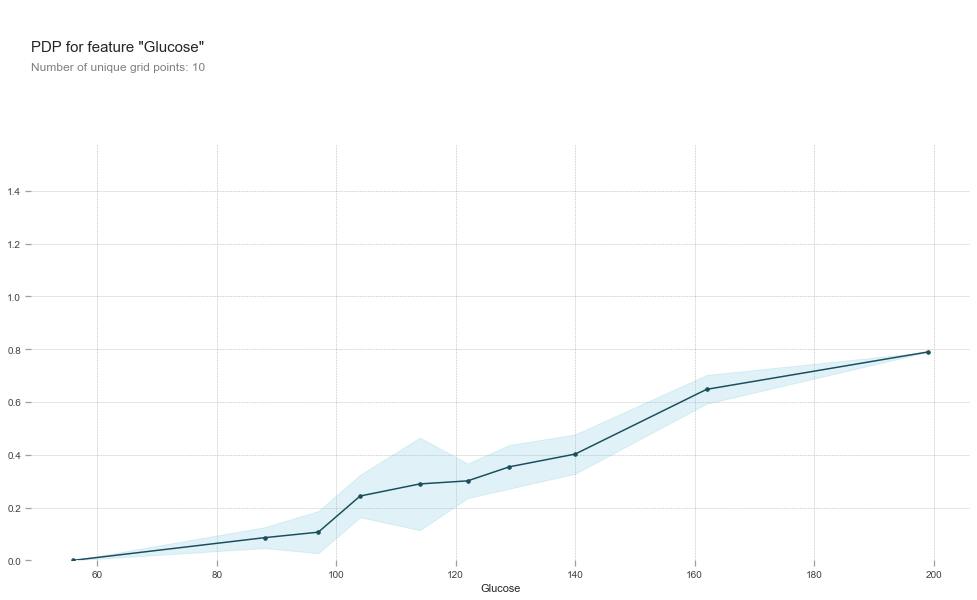

In [128]:
from pdpbox import pdp, get_dataset, info_plots
features_name = [i for i in features.columns]

pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=features_name, feature='Glucose')

pdp.pdp_plot(pdp_goals, 'Glucose')
plt.show()

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x18574b36c48>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x18574c99dc8>})

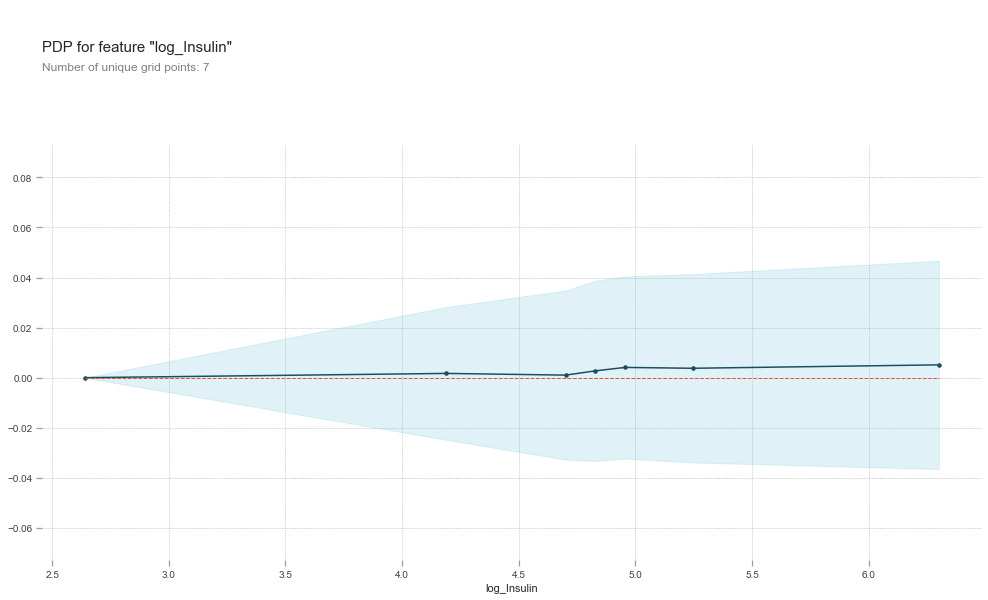

In [130]:
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=features_name, feature='log_Insulin')
pdp.pdp_plot(pdp_goals, 'log_Insulin')

The Y-axis represents the change in prediction from what it would be predicted at the baseline or leftmost value <br>
Blue area denotes the confidence interval <br>
For the 'Glucose' graph, we observe that probability of a person having diabetes steeply increases as the glucose level goes beyond 140 and the probability remains high <br>
For the 'Insulin' graph, we observe that probability of a person having diabetes slightly increases continuously as the Insulin level goes up and then remain constant<br>
Also the unique grid points indicate the changes in probability value as the values of features increases

Text(0.5, 1.0, 'Interpretation of the feature Age')

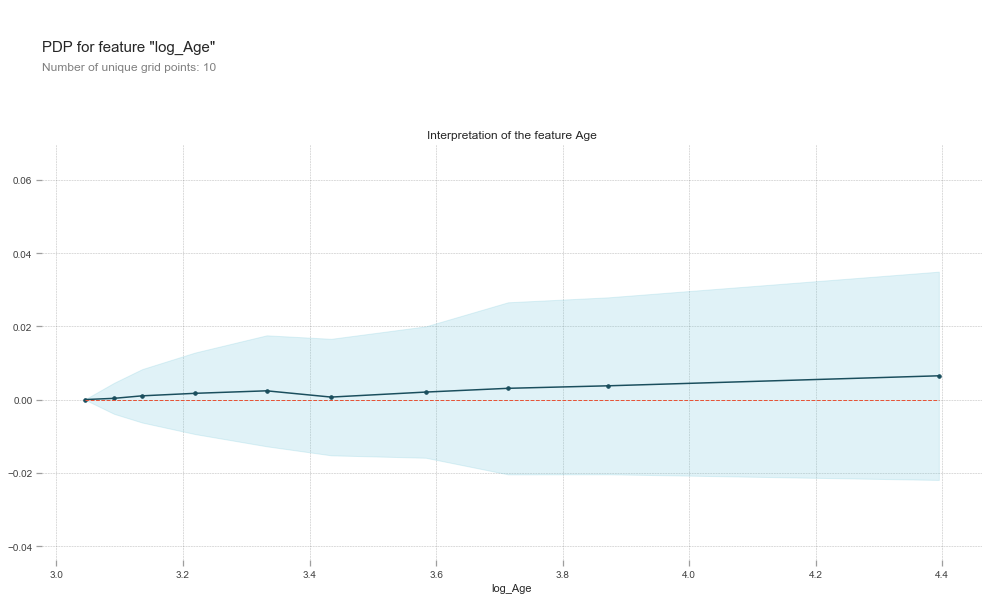

In [131]:
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=features_name, feature='log_Age')
pdp.pdp_plot(pdp_goals, 'log_Age')
plt.title('Interpretation of the feature Age')

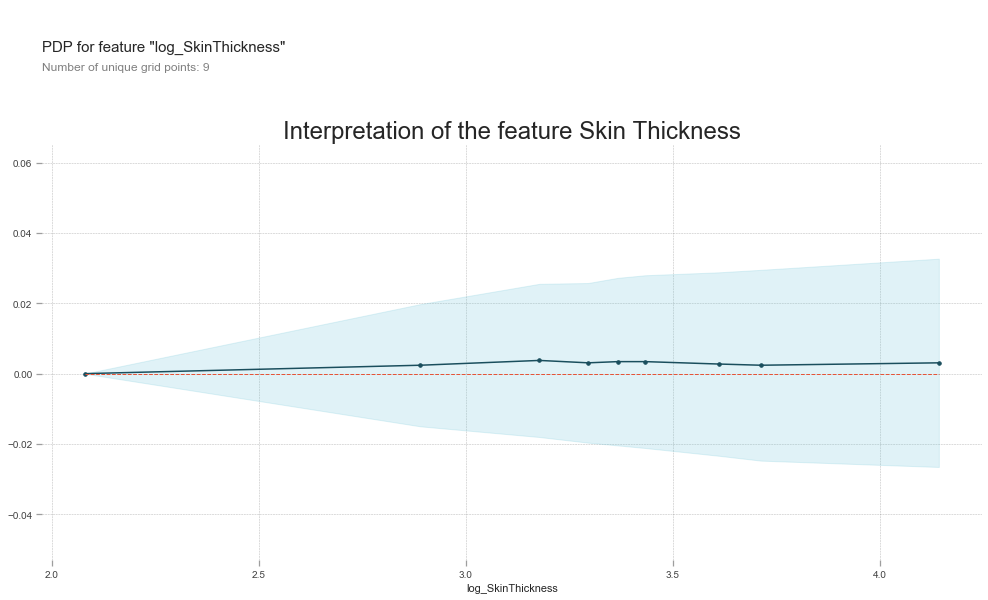

In [132]:
sns.set(font_scale=2.0)
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=features_name, feature='log_SkinThickness')
pdp.pdp_plot(pdp_goals, 'log_SkinThickness')
plt.title('Interpretation of the feature Skin Thickness')
plt.show()

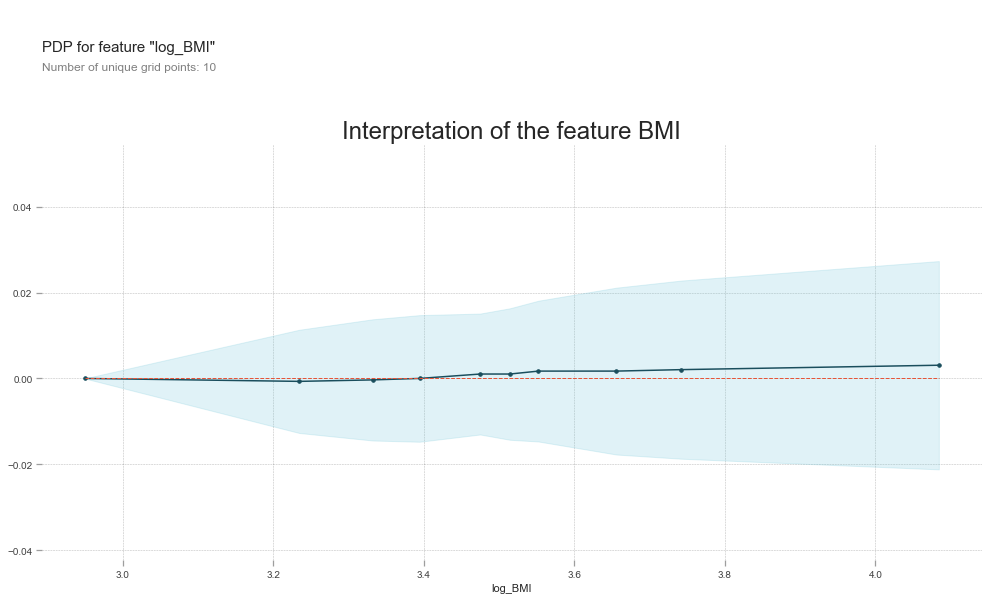

In [133]:
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=features_name, feature='log_BMI')
pdp.pdp_plot(pdp_goals, 'log_BMI')
plt.title('Interpretation of the feature BMI')
plt.show()

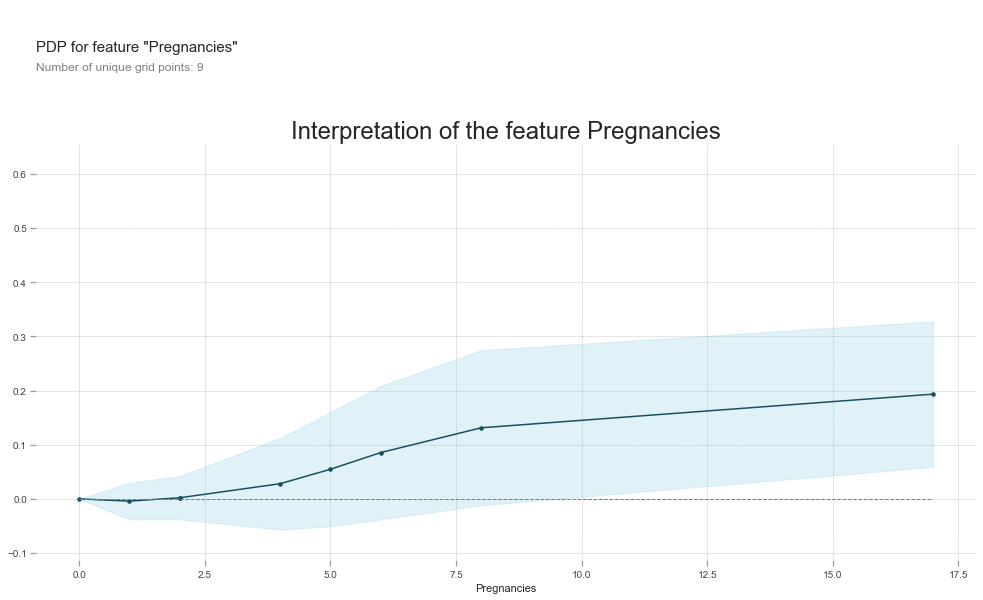

In [134]:
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=features_name, feature='Pregnancies')
pdp.pdp_plot(pdp_goals, 'Pregnancies')
plt.title('Interpretation of the feature Pregnancies')
plt.show()

The chart above says if no of pregnancies is up to and greater than 8, probability of having diabetes will increase ***0.1***

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

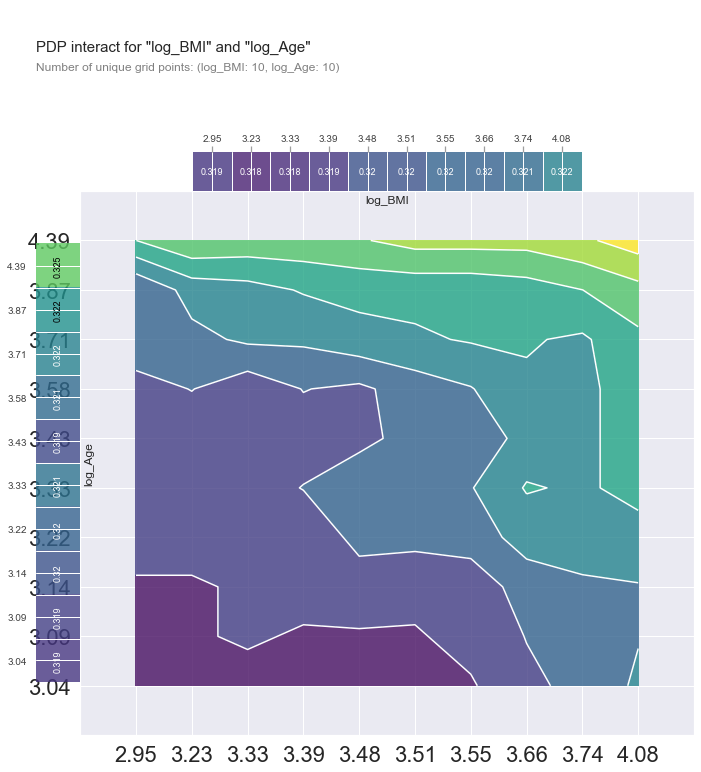

In [136]:
# Visualizing 2 at the same time
features_to_plot = ['log_BMI', 'log_Age']
pdp_goal = pdp.pdp_interact(model=model, model_features=features_name, dataset=X_test, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=pdp_goal, feature_names=features_to_plot, plot_pdp=True)
plt.show()

### Using SHAP Values

SHAP stands for SHapley Additive exPlanation, helps to break down a prediction to show the impact of each feature. it is based on Shapley values, a technique used in game theory to determine how much each player in a collaborative game has contributed to its success. Normally, getting the trade-off between accuracy and interpretability just right can be a difficult balancing act but SHAP values can deliver both

SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

In [138]:
data_for_prediction = X_test.iloc[19]
data_for_prediction

Glucose              78.000000
log_BMI               3.517498
log_Age               3.218876
log_Insulin           4.828314
Pregnancies           5.000000
log_SkinThickness     3.367296
Name: 117, dtype: float64

In [160]:
import shap

explainer = shap.KernelExplainer(model.predict, X_test)
shap_values = explainer.shap_values(X_test)

Using 154 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


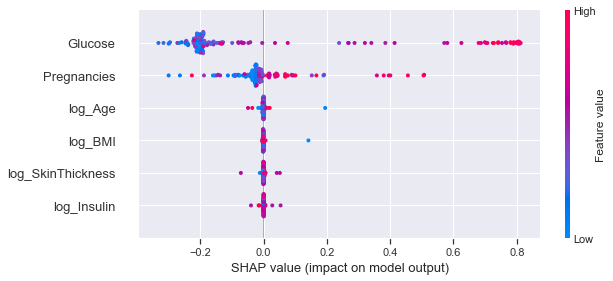

In [161]:
shap.initjs()
shap.summary_plot(shap_values, X_test)

The plot shows **Glucose** to have much impact on having `diabetes` and **pregnancies** follows suite in decreasing order

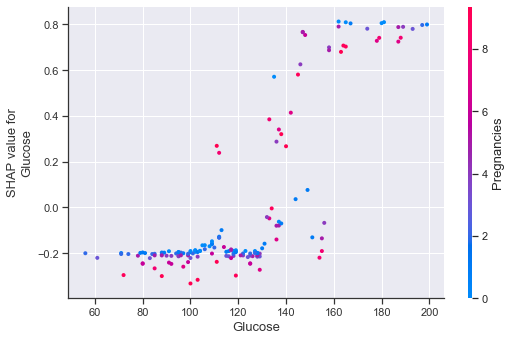

In [162]:
shap.dependence_plot("Glucose", shap_values, X_test)

THis shows that Glucose interact with Pregnancies frequently. Also we could check for other features too

In [163]:
shap.force_plot(explainer.expected_value, shap_values[10,:], X_test.iloc[10,:])

The Prediction for this observation is 1.00. The driving forces identified by the model are: log_Insulin, Glucose and Pregnancies. This means that this are the contributing factors towards the observation having diabetes.

In [164]:
shap.force_plot(explainer.expected_value, shap_values, X_test)

Got to Say i Love this chart interaction with chart will just explain itself Really Amazing

## 9. A Detailed Report

i will like to start with knowing about the data and give summary about the findings
1. know about the data
2. Explain Findings
3. Recomendation

 **1. know about the data**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset <br>

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. <br>

**Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?** <br>
 **2. Explain Findings**
Features like Glucose and BloodPressure are normally distributed while Features like Age, BMI, Insulin, SkinThickness are Skewed. The Skewed features was handled by taking the logarithm of the values and that was how it was use to build the model. <br>
While Interpreting the result of the model, Assumptions like `if pregnancy is more than 4, increases the chance of having diabetes was verified`. Also assumption 2: `if glucose level is high i.e glucose > 140, then probability of having diabetes is high or increases was also verified`. <br>
Building the model <br>
it was discovered that features like Glucose contribute to people having diabetes, also high BMI will increase the chance of having diabetes. if `Insulin` level is high, chance of having diabetes will reduce. Also a low level of Glucose and small value of Pregnancy will reduce the chance of having diabetes. <br>
 **3. Recomendation**
1. Always do Cardio atleast 20 mins per day to reduce the Glucose level
2. Eat bitter leafs and reduce the intakes of sweet things like snacks
3. Do Child COntrol and use condoms if you do not wish to get pregnant
4. Tell your Husband `he don do nah you wan kill me` lolss

who's laughing???
**Thank YOU**